**SIMPLE LINEAR REGRESSION**

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv( 'Life Expectancy Data.csv' )
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


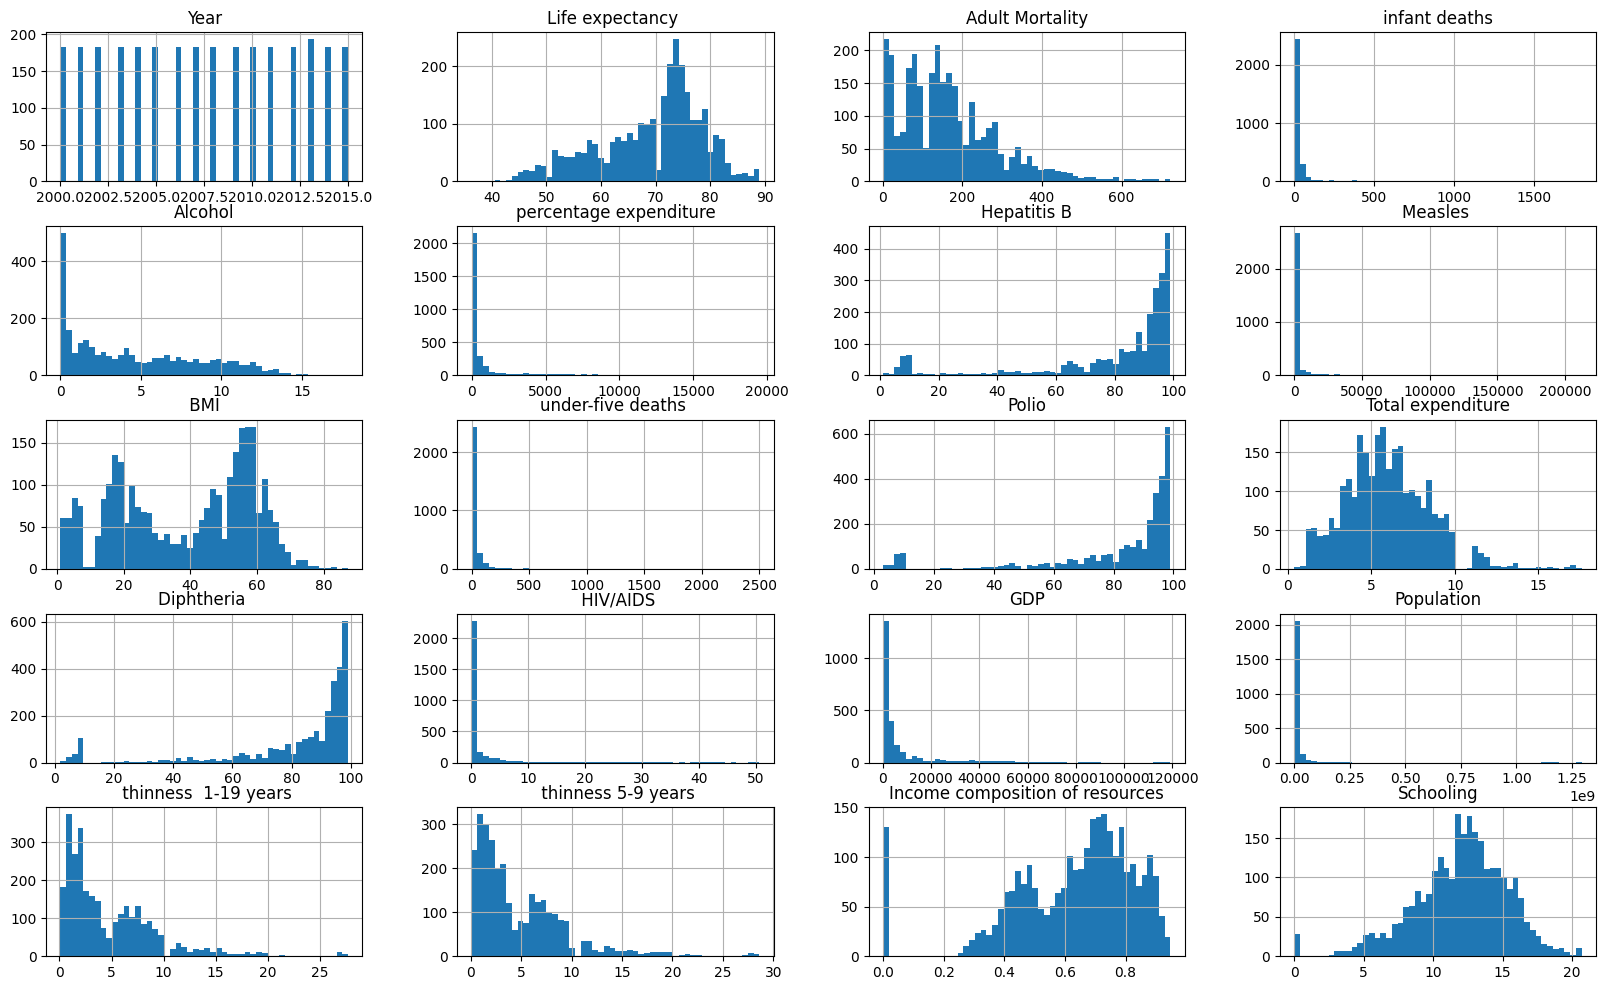

In [13]:
df.hist(bins=50, figsize=(20,12))
plt.show()

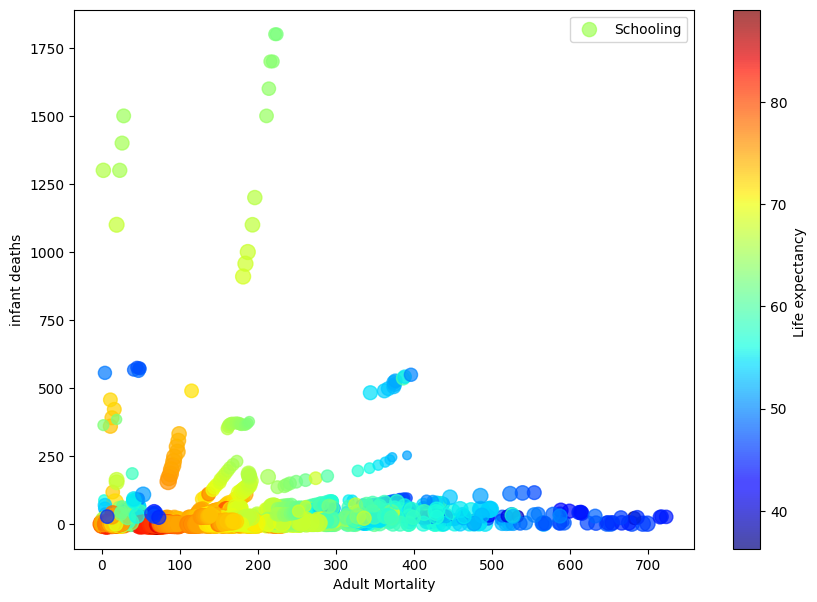

In [14]:
if all(col in df.columns for col in ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']):
    df.plot(kind="scatter", x="Adult Mortality", y="infant deaths", c="Life expectancy ", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['Schooling']*10, label="Schooling", alpha=0.7)
    plt.show()
else:
    print("Error: One or more required columns ('Adult Mortality', 'infant deaths', 'Life expectancy ', 'Schooling') not found in the DataFrame.")

In [15]:
df.isna().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [16]:
df.dtypes

,0
Country,object
Year,int64
Status,object
Life expectancy,float64
Adult Mortality,float64
infant deaths,int64
Alcohol,float64
percentage expenditure,float64
Hepatitis B,float64
Measles,int64


In [17]:
X = df[["Adult Mortality"]]
y = df["Life expectancy "]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
lr = LinearRegression()

In [20]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies

# Fit the imputer on the training data and transform X_train
X_train_imputed = imputer.fit_transform(X_train)

# Impute missing values in y_train as well
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)) # Reshape to a 2D array
y_train_imputed = y_train_imputed.ravel() # Flatten back to a 1D array

# Now you can fit the model
lr.fit(X_train_imputed, y_train_imputed)

LinearRegression()

In [21]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies

# ... (your existing code for imputing X_train and y_train) ...

# Fit the imputer on X_train (or the entire dataset if preferred)
imputer.fit(X_train) # Fit before transforming X_test

# Now, impute missing values in X_test as well before prediction
X_test_imputed = imputer.transform(X_test)  # Use transform, not fit_transform, for X_test

# Now you can predict using the imputed X_test
y_pred = lr.predict(X_test_imputed)

In [22]:
# Impute missing values in y_test before calculating R^2 score

# Import SimpleImputer if not already imported
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies

# Reshape y_test to a 2D array for imputation
y_test_reshaped = y_test.values.reshape(-1, 1)

# Fit the imputer on y_test_reshaped and transform
y_test_imputed = imputer.fit_transform(y_test_reshaped)

# Flatten back to a 1D array
y_test_imputed = y_test_imputed.ravel()

# Now calculate the R^2 score using the imputed y_test
r2_score(y_test_imputed, y_pred)

0.44659606601165613

In [23]:
print(lr.intercept_)

78.1809592152868


In [24]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([64.05936635])

In [25]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [26]:
#some bonus points.
#model persistance (saving and loading trained models)
import pickle

In [27]:
# save the trained model lr to a file named 'model.pkl'
with open('model.pkl', 'wb') as f:  # Use 'wb' to write in binary mode for pickle
    pickle.dump(lr, f)  # Save the lr model

# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [28]:
X[0:5]

,Adult Mortality
0,263.0
1,271.0
2,268.0
3,272.0
4,275.0


In [29]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([64.05936635, 63.6298122 , 63.790895  , 63.57611793, 63.41503512])

In [30]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

      Actual  Predicted
2546    73.7  71.576564
650     75.9  72.113507
1740    74.2  71.469176
177     76.8  77.805099
1377    51.9  55.199812


**MULTIPLE LINEAR REGRESSION**

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv( 'Life Expectancy Data.csv' )

In [32]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [33]:
X = df.drop(columns=['Life expectancy '])
y = df['Life expectancy ']

In [34]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2938, 21)
Shape of y: (2938,)


In [35]:
# =======================================
# Multiple Linear Regression
# =======================================

# Import SimpleImputer if not already imported
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies

# Fit the imputer on the training data and transform X_train and y_train
X_train_imputed = imputer.fit_transform(X_train)
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1))
y_train_imputed = y_train_imputed.ravel() # Flatten back to a 1D array

# Initialize the model
model_multiple = LinearRegression()

# Train the model using the imputed data
model_multiple.fit(X_train_imputed, y_train_imputed)

# Impute missing values in X_test before prediction
X_test_imputed = imputer.transform(X_test)  # Use transform, not fit_transform, for X_test

# Predict on the test data
y_pred_multiple = model_multiple.predict(X_test_imputed)

# Impute missing values in y_test before calculating metrics
y_test_imputed = imputer.fit_transform(y_test.values.reshape(-1, 1))
y_test_imputed = y_test_imputed.ravel()  # Flatten back to a 1D array


# Evaluate the model using imputed y_test
mse_multiple = mean_squared_error(y_test_imputed, y_pred_multiple)  # Use imputed y_test
r2_multiple = r2_score(y_test_imputed, y_pred_multiple) # Use imputed y_test

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 48.0448
  R² Score: 0.4454


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(


In [36]:
print(model_multiple.intercept_)

78.1809592152868


In [37]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [38]:
# Assuming X is your full dataset with all features and y is the target variable 'Profit'
# Import necessary libraries if not already imported
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score

# Identify categorical features
categorical_features = ['Country']  # Changed 'State' to 'Country' as it's the categorical column in your data

# Check if 'Country' column exists in your DataFrame
if 'Country' in X.columns:
    # Create a ColumnTransformer to apply OneHotEncoding to categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), X.select_dtypes(include=np.number).columns.tolist()),  # Impute numerical features
            ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # One-hot encode categorical features
        ])

    # Preprocess X
    X_encoded = preprocessor.fit_transform(X)

    # Impute missing values in y before splitting # This is the added part
    imputer_y = SimpleImputer(strategy='mean')
    y_imputed = imputer_y.fit_transform(y.values.reshape(-1, 1)).ravel()

    # Split data into training and testing sets using imputed y
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_imputed, test_size=0.2, random_state=42)

    # Fit the model using the training data with all features
    model_multiple = LinearRegression()
    model_multiple.fit(X_train, y_train)  # X_train now contains all features

    # Predict using the test set
    y_pred_multiple = model_multiple.predict(X_test)

    # Evaluate model performance
    mse_multiple = mean_squared_error(y_test, y_pred_multiple)
    r2_multiple = r2_score(y_test, y_pred_multiple)

    print("\nMultiple Linear Regression")
    print(f"  Mean Squared Error: {mse_multiple:.4f}")
    print(f"  R² Score: {r2_multiple:.4f}")
    print(model_multiple.intercept_)
    print(model_multiple.predict(X_encoded[0:5])) # Predicting first 5 rows of encoded dataset

else:
    print("'Country' column not found in dataset. This should not happen.")


Multiple Linear Regression
  Mean Squared Error: 3.0584
  R² Score: 0.9647
-464.28296966101266
[60.60234419 60.49900495 60.20992119 59.95733715 59.61768082]


In [39]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

   Actual  Predicted
0    73.7  70.414633
1    75.9  75.782470
2    74.2  74.665039
3    76.8  77.426417
4    51.9  51.449552
